In [50]:
# условия заданий: https://stepik.org/lesson/375669/step/1?unit=363419

# Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, 
# посмотрите на описательную статистику. 
# Вопрос: Сколько уникальных значений принимает переменная platform?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [10]:
logs.platform.nunique()

3

In [65]:
# Какой клиент совершил больше всего успешных операций?
# Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через 
# запятую и пробел в порядке возрастания. Например:
# 12, 123, 456

success_operations = (logs.groupby('client', as_index = False)
                         .agg({'success': 'sum'})
                         .rename(columns = {'success': 'success_counts'}))
max_operations = success_operations.success_counts.max()
clients_list = (success_operations.query(f'success_counts == {max_operations}')
                    .sort_values('client')).client.to_list()
', '.join([str(client) for client in clients_list])

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

In [81]:
# С какой платформы осуществляется наибольшее количество успешных операций?

logs.groupby('platform').agg({'success': 'sum'}).idxmax()

success    phone
dtype: object

In [18]:
# Какую платформу предпочитают премиумные клиенты?

(user_data.query('premium')
         .merge(logs, on = 'client')
         .value_counts('platform')).idxmax()

'phone'

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

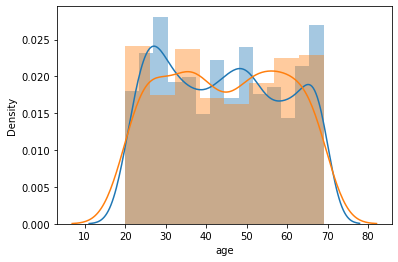

In [29]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn 
# с исходными параметрами. Какой график получится в результате?
# Используйте датасэт, который вы получили на предыдущем шаге.

df = user_data.merge(logs, on = 'client')
sns.distplot(df.query('premium == False').age)
sns.distplot(df.query('premium == True').age)

C:\tools\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success'>

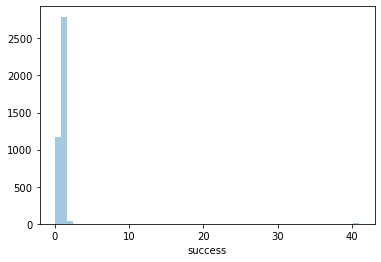

In [42]:
# Постройте график распределения числа успешных операций: 
# x – число успешных операций
# y – число клиентов, совершивших столько успешных операций

df = logs.groupby('client').agg({'success': 'sum'})
sns.distplot(df.success, kde = False)

<AxesSubplot:xlabel='age', ylabel='success'>

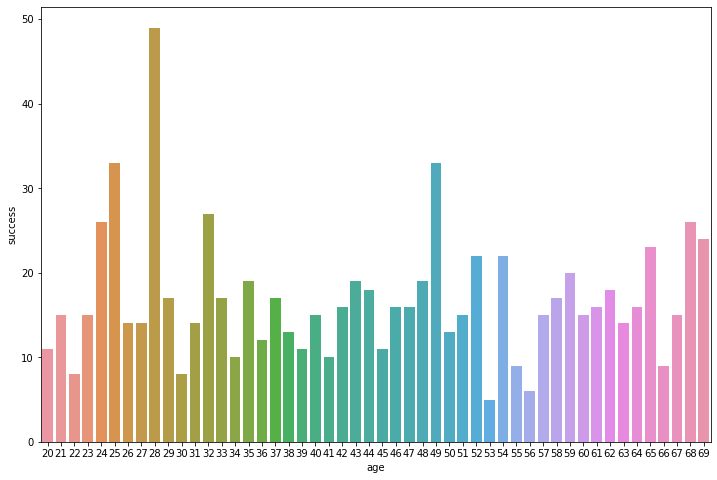

In [60]:
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. 
# По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить 
# plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 
# Вопрос: Клиенты какого возраста совершили наибольшее количество успешных действий?

# вариант 1
df = (user_data.merge(logs, on = 'client')
         .query('platform == "computer" and success')
         .groupby('age', as_index = False)
         .agg({'success': 'count'}))
plt.figure(figsize=(12, 8))
sns.barplot(x = df.age, y = df.success)

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

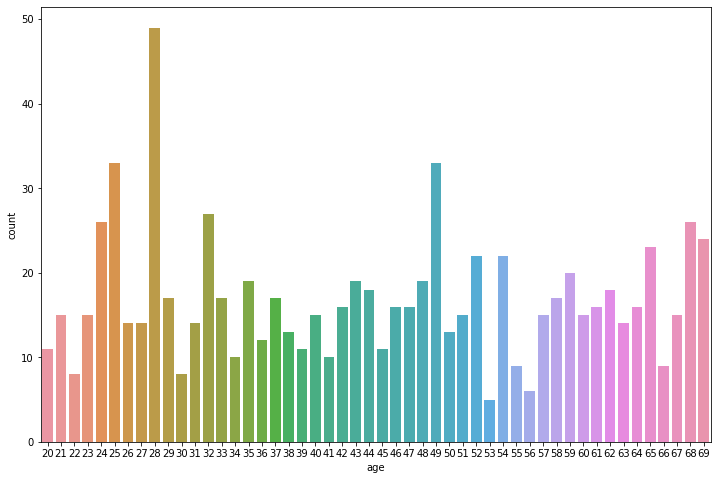

In [63]:
#  вариант 2

df = (user_data.merge(logs, on = 'client')
         .query('platform == "computer" and success'))
plt.figure(figsize=(12, 8))
sns.countplot(df.age)